In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df[df.species=="setosa"].shape

(50, 5)

In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df.species=df.species.replace({"setosa":0,"versicolor":1,"virginica":2})

In [12]:
df.species.unique()

array([0, 1, 2], dtype=int64)

In [13]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [14]:
import matplotlib.pyplot as plt

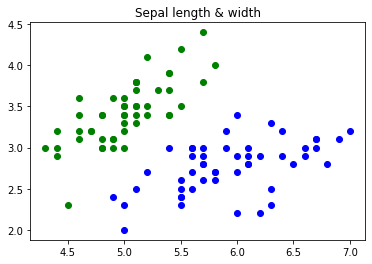

In [17]:
plt.title("Sepal length & width")
plt.scatter(df0["sepal_length"],df0["sepal_width"],color="green")
plt.scatter(df1["sepal_length"],df1["sepal_width"],color="blue");


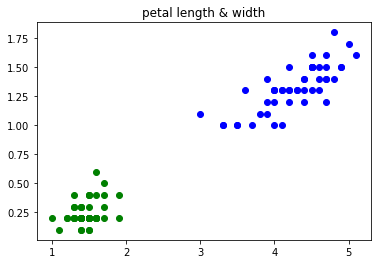

In [18]:
plt.title("petal length & width")
plt.scatter(df0["petal_length"],df0["petal_width"],color="green")
plt.scatter(df1["petal_length"],df1["petal_width"],color="blue");

We can clearly see there is two groups has been formed between thswes two graphs..

In [19]:
# we will use only setosa and versicolor class for understanding KNN


In [20]:
X=df.iloc[0:100,:-1]
y=df.iloc[0:100,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
40,5.0,3.5,1.3,0.3
96,5.7,2.9,4.2,1.3
9,4.9,3.1,1.5,0.1
72,6.3,2.5,4.9,1.5
...,...,...,...,...
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


# Create KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
y_pred=neigh.predict(X_test)

In [30]:
neigh.score(X_test,y_test)

1.0

<AxesSubplot:>

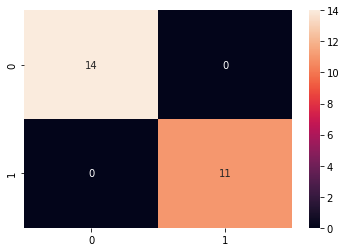

In [32]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)